# Interpolación polinómica
Los métodos implementados son los siguientes:
- Forma de Lagrange: `forma_lagrange`.
- Forma de Newton: `forma_newton`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Problema propuesto
Calcular el polinomio que interpola los datos
$$(0, 1), (1, 2), (2, -1), (3, 0).$$

In [2]:
xs = np.array([0, 1, 2, 3])
ys = np.array([1, 2, -1, 0])

list(zip(xs, ys))

[(0, 1), (1, 2), (2, -1), (3, 0)]

## Forma de Lagrange
Dados $n+1$ puntos distintos
$$(x_0, y_0), (x_1, y_1), \dots (x_n, y_n),$$
el polinomio de interpolación de Lagrange de estos puntos se puede calcular mediante la forma de Lagrange como
$$p(x) = \sum_{i=0}^n y_il_i(x),$$
donde
$$l_i(x) = \frac{(x-x_0)\dots\widehat{(x-x_i)}\dots(x-x_n)}{(x_i-x_0)\dots\widehat{(x_i-x_i)}\dots(x_i-x_n)}.$$

In [3]:
def forma_lagrange(xs, ys, x):
    n = len(xs)
    s = 0
    for i in range(n):
        l = 1
        for xj in xs:
            if xj != xs[i]:
                l *= (x - xj)/(xs[i] - xj)
        s += ys[i]*l
    return s

Calculamos la forma de Lagrange del polinomio de interpolación para nuestro problema.

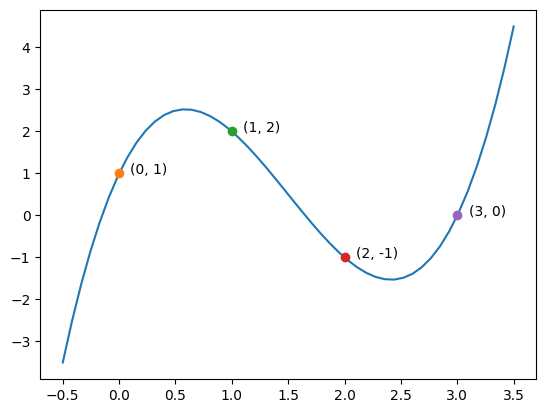

In [4]:
z = np.linspace(-0.5, 3.5, 50)
fz = forma_lagrange(xs, ys, z)

plt.plot(z, fz)
for x, y in zip(xs, ys):
    plt.plot(x, y, marker = "o")
    plt.text(x + 0.1, y, "(%i, %i)" % (x, y))
plt.show()

## Forma de Newton
Dados $n+1$ puntos distintos
$$(x_0, y_0), (x_1, y_1), \dots (x_n, y_n),$$
el polinomio de interpolación de Lagrange de estos puntos se puede calcular mediante la forma de Newton como
$$p(x) = f[x_0] + f[x_0, x_1](x-x_0) + \dots + f[x_0, \dots, x_n](x-x_0)\dots(x-x_{n-1}),$$
donde las diferencias divididas se calculan como
\begin{align*}
    & f[x_i] = y_i, \\
    & f[x_{i_0}, x_{i_1}, \dots, x_{i_k}] = \frac{f[x_{i_1}, \dots, x_{i_k}] - f[x_{i_0}, x_{i_1}, \dots, x_{i_ {k-1}}]}{x_{i_k}-x_{i_0}}.
\end{align*}

In [5]:
def diferencias_divididas(xs, ys):
    n = len(xs)
    diferencias = np.zeros((n, n))
    diferencias[:, 0] = ys
    yn = ys
    for i in range(n-1):
        dx = xs[i+1:n] - xs[:n-(i+1)]
        yn = np.diff(yn)/dx
        diferencias[i+1:n, i+1] = yn
    return diferencias

def forma_newton(xs, ys, x):
    n = len(xs)
    diferencias = diferencias_divididas(xs, ys)
    suma = diferencias[0, 0]
    producto = 1
    for i in range(1, n):
        producto *= (x - xs[i-1])
        suma += diferencias[i, i] * producto
    return suma

Calculamos la forma de Newton del polinomio de interpolación para nuestro problema.

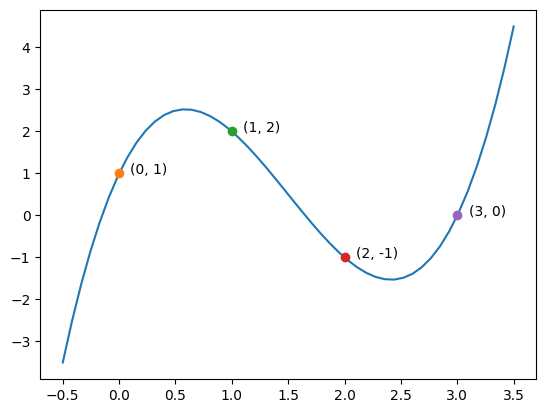

In [6]:
z = np.linspace(-0.5, 3.5, 50)
fz = forma_newton(xs, ys, z)

plt.plot(z, fz)
for x, y in zip(xs, ys):
    plt.plot(x, y, marker = "o")
    plt.text(x + 0.1, y, "(%i, %i)" % (x, y))
plt.show()